# Kickstarter Project Analysis

In [66]:
# Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import re

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Clustering models
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA

# Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve,
    silhouette_score, davies_bouldin_score
)

In [67]:
# Load pre-merged datasets
# Note: Run merge_datasets.py first if these files don't exist

print("Loading merged datasets...")

df_oct = pd.read_csv('data/kickstarter_october_merged.csv')
print(f"October dataset shape: {df_oct.shape}")

df_nov = pd.read_csv('data/kickstarter_november_merged.csv')
print(f"November dataset shape: {df_nov.shape}")

# Use October dataset as main df for now
df = df_oct.copy()
print("\nDatasets loaded successfully!")
df.head()

Loading merged datasets...
October dataset shape: (259197, 42)
November dataset shape: (261814, 42)

Datasets loaded successfully!


,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_exchange_rate,usd_pledged,usd_type,video
0,2,The idea is to let you discover particular and...,"{""id"":360,""name"":""Video"",""analytics_name"":""Vid...",2.0,IT,Italy,1602543490,"{""id"":1956170825,""name"":""A&S"",""slug"":""ctwcot"",...",EUR,€,...,False,False,failed,1604412984,1.181673,"{""web"":{""project"":""https://www.kickstarter.com...",1.163115,2.363345,domestic,NaN
1,2,"Coffee talks, a youtube channel, hosted by two...","{""id"":360,""name"":""Video"",""analytics_name"":""Vid...",2.0,US,the United States,1593492977,"{""id"":1673336323,""name"":""megan"",""slug"":""coffee...",USD,$,...,False,False,failed,1599159477,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,2.000000,domestic,"{""id"":1048245,""status"":""successful"",""hls"":""htt..."
2,4,A film following Ojo as he sails from Portland...,"{""id"":360,""name"":""Video"",""analytics_name"":""Vid...",81.0,US,the United States,1593471320,"{""id"":307777110,""name"":""Ojo Jojin"",""slug"":""rui...",USD,$,...,False,False,failed,1597332479,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,81.000000,domestic,NaN
3,0,A complete MasterClass in Grasshopper for Indu...,"{""id"":28,""name"":""Product Design"",""analytics_na...",NaN,HK,Hong Kong,1757592188,"{""id"":2131143870,""name"":""Ussa Design"",""slug"":""...",HKD,$,...,False,False,started,1757592188,0.000000,"{""web"":{""project"":""https://www.kickstarter.com...",NaN,NaN,domestic,NaN
4,208,A Documentary about my Dad leaving Earth (agai...,"{""id"":30,""name"":""Documentary"",""analytics_name""...",45831.0,US,the United States,1648842475,"{""id"":1248171395,""name"":""Nico Lopez-Alegria"",""...",USD,$,...,True,True,successful,1651775027,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,45831.110000,domestic,"{""id"":1159169,""status"":""successful"",""hls"":""htt..."


In [68]:
# Display basic information about the dataset
print("Shape:", df.shape)
print("\nColumns:", list(df.columns))

print("\nInfo:")
df.info()

display(df.describe(include='all').T.head(20))

Shape: (259197, 42)

Columns: ['backers_count', 'blurb', 'category', 'converted_pledged_amount', 'country', 'country_displayable_name', 'created_at', 'creator', 'currency', 'currency_symbol', 'currency_trailing_code', 'current_currency', 'deadline', 'disable_communication', 'fx_rate', 'goal', 'id', 'is_disliked', 'is_in_post_campaign_pledging_phase', 'is_launched', 'is_liked', 'is_starrable', 'launched_at', 'location', 'name', 'percent_funded', 'photo', 'pledged', 'prelaunch_activated', 'profile', 'slug', 'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at', 'static_usd_rate', 'urls', 'usd_exchange_rate', 'usd_pledged', 'usd_type', 'video']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259197 entries, 0 to 259196
Data columns (total 42 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   backers_count                       259197 non-null  int64  
 1   blurb         

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
backers_count,259197.0,NaN,NaN,NaN,127.841835,705.725376,0.0,3.0,26.0,87.0,105857.0
blurb,259101,201758,"A high-quality Figurines, STL file, 3D printab...",59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,259197,171,"{""id"":34,""name"":""Tabletop Games"",""analytics_na...",11172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
converted_pledged_amount,242557.0,NaN,NaN,NaN,17496.967628,220405.327468,0.0,225.0,2071.0,8023.0,46762258.0
country,259197,25,US,162879,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_displayable_name,259197,25,the United States,162879,NaN,NaN,NaN,NaN,NaN,NaN,NaN
created_at,259197.0,NaN,NaN,NaN,1592623647.080371,133493023.366696,1240366270.0,1471365581.0,1615308101.0,1721322349.0,1760329518.0
creator,259197,257192,"{""id"":2053011023,""name"":""Benjamin Hennessey"",""...",9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
currency,259197,15,USD,162896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
currency_symbol,259197,7,$,193513,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
df.isna().sum()

backers_count                              0
blurb                                     96
category                                   0
converted_pledged_amount               16640
country                                    0
country_displayable_name                   0
created_at                                 0
creator                                    0
currency                                   0
currency_symbol                            0
currency_trailing_code                     0
current_currency                           0
deadline                                   0
disable_communication                      0
fx_rate                                    0
goal                                       0
id                                         0
is_disliked                                0
is_in_post_campaign_pledging_phase    164378
is_launched                                0
is_liked                                   0
is_starrable                               0
launched_a

In [70]:
# Missing value Ration
missing_ratio = df.isnull().sum() / len(df) * 100
missing_ratio = missing_ratio[missing_ratio > 0].sort_values(ascending=False)
missing_ratio

is_in_post_campaign_pledging_phase    63.418172
video                                 37.439091
converted_pledged_amount               6.419827
usd_exchange_rate                      6.419827
usd_pledged                            6.419827
location                               0.155480
usd_type                               0.050927
blurb                                  0.037037
dtype: float64

## Exploratory Data Analysis (EDA)

In [71]:
# Filter to only successful and failed states
print("=== OCTOBER DATASET ===")
print("States before filtering:")
print(df_oct['state'].value_counts())
print(f"Total rows before: {len(df_oct)}")

df_oct = df_oct[df_oct['state'].isin(['successful', 'failed'])].copy()

print(f"\nTotal rows after filtering: {len(df_oct)}")
print("States after filtering:")
print(df_oct['state'].value_counts())

print("\n=== NOVEMBER DATASET ===")
print("States before filtering:")
print(df_nov['state'].value_counts())
print(f"Total rows before: {len(df_nov)}")

df_nov = df_nov[df_nov['state'].isin(['successful', 'failed'])].copy()

print(f"\nTotal rows after filtering: {len(df_nov)}")
print("States after filtering:")
print(df_nov['state'].value_counts())

# Update main df to use filtered October data
df = df_oct.copy()
print(f"\n=== Main df now uses filtered October data: {len(df)} rows ===")

=== OCTOBER DATASET ===
States before filtering:
state
successful    147176
failed         77262
submitted      13931
canceled        9331
live            8788
started         2700
suspended          9
Name: count, dtype: int64
Total rows before: 259197

Total rows after filtering: 224438
States after filtering:
state
successful    147176
failed         77262
Name: count, dtype: int64

=== NOVEMBER DATASET ===
States before filtering:
state
successful    150556
failed         76243
submitted      13610
live            9396
canceled        9235
started         2764
suspended         10
Name: count, dtype: int64
Total rows before: 261814

Total rows after filtering: 226799
States after filtering:
state
successful    150556
failed         76243
Name: count, dtype: int64

=== Main df now uses filtered October data: 224438 rows ===


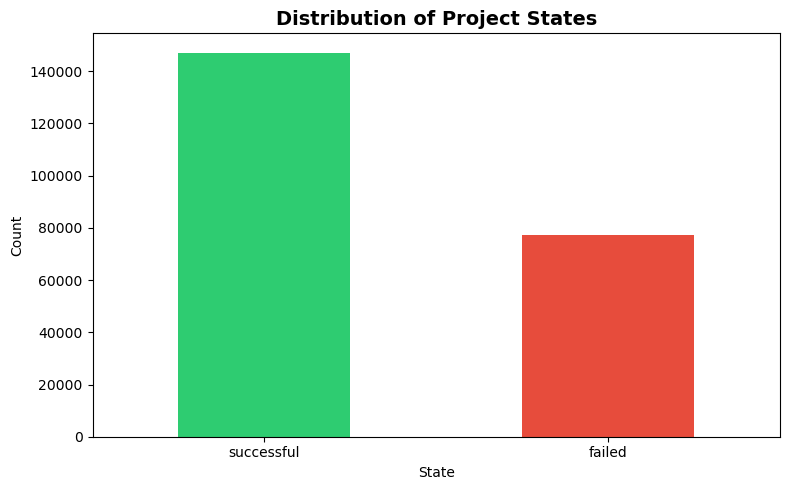

state
successful    147176
failed         77262
Name: count, dtype: int64

Success Rate: 65.58%


In [72]:
# Distribution of target variable
plt.figure(figsize=(8, 5))
df['state'].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Distribution of Project States', fontsize=14, fontweight='bold')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print(df['state'].value_counts())
print(f"\nSuccess Rate: {(df['state'] == 'successful').mean() * 100:.2f}%")

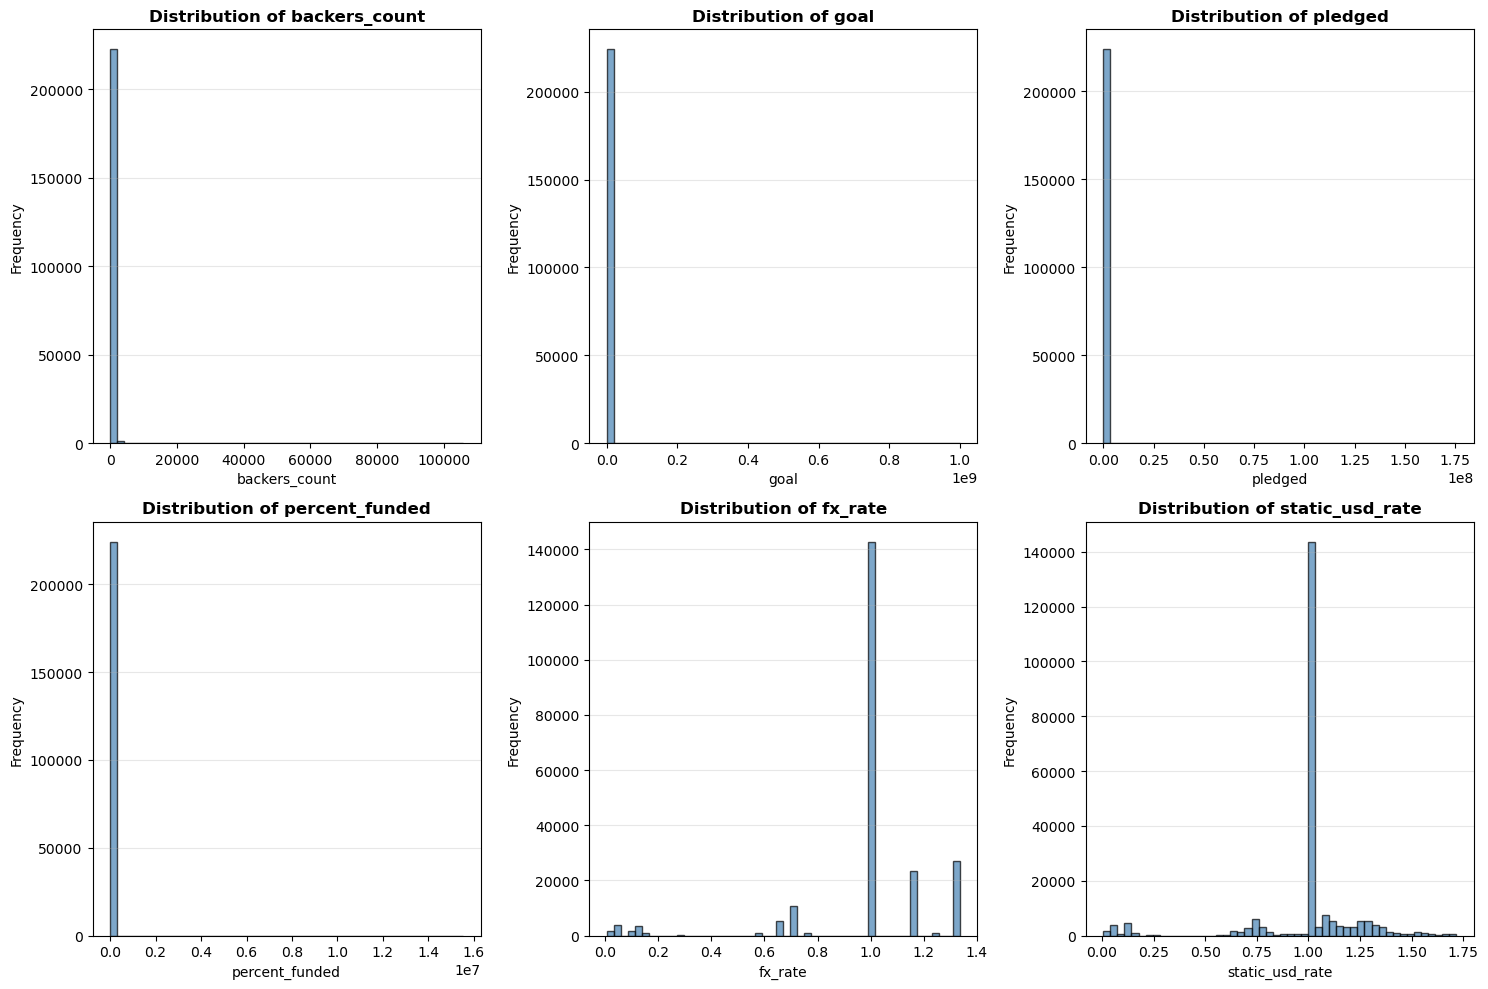

In [73]:
# Histograms for numerical features
numerical_cols = ['backers_count', 'goal', 'pledged', 'percent_funded', 'fx_rate', 'static_usd_rate']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    if col in df.columns:
        axes[idx].hist(df[col].dropna(), bins=50, color='steelblue', edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribution of {col}', fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
        axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

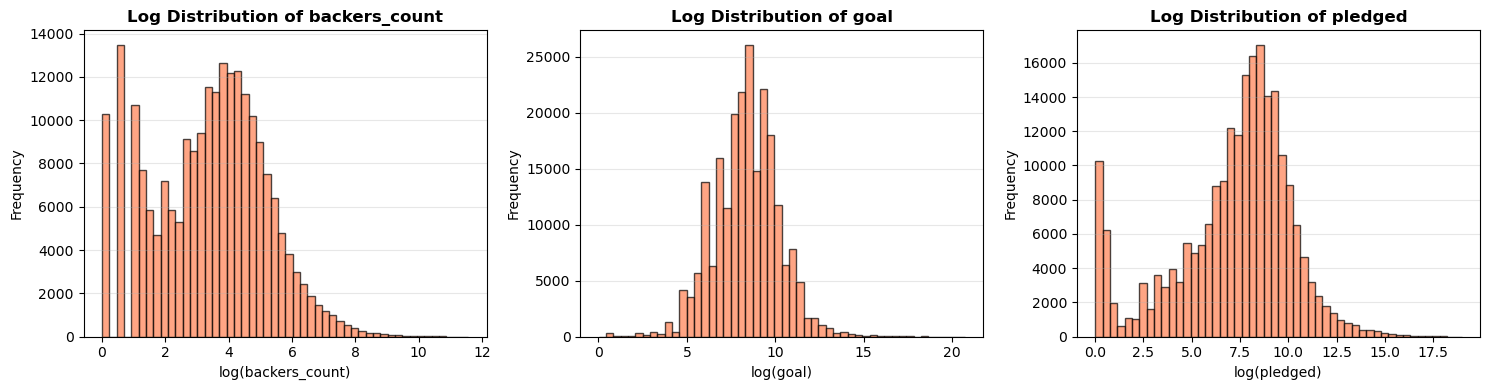

In [74]:
# Log-transformed histograms for skewed features
skewed_cols = ['backers_count', 'goal', 'pledged']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, col in enumerate(skewed_cols):
    if col in df.columns:
        # Add 1 to avoid log(0)
        log_data = np.log1p(df[col].dropna())
        axes[idx].hist(log_data, bins=50, color='coral', edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Log Distribution of {col}', fontweight='bold')
        axes[idx].set_xlabel(f'log({col})')
        axes[idx].set_ylabel('Frequency')
        axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

States in dataset: ['failed' 'successful']
State counts:
state
successful    147176
failed         77262
Name: count, dtype: int64


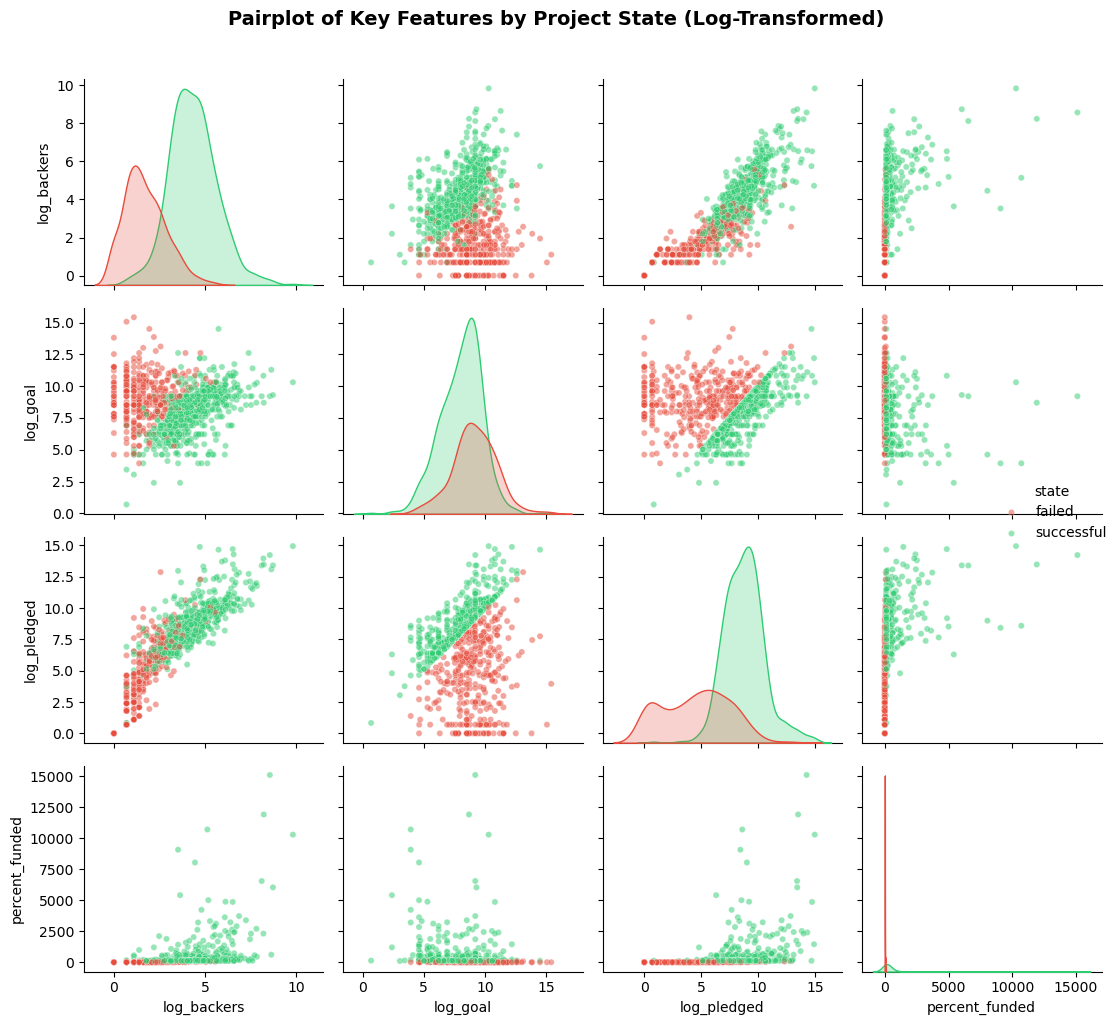

In [75]:
# Pairplot for key numerical features by state
# First, check what states exist in the data
print("States in dataset:", df['state'].unique())
print("State counts:")
print(df['state'].value_counts())

# Select a subset of features for pairplot to keep it readable
pairplot_features = ['backers_count', 'goal', 'pledged', 'percent_funded', 'state']

# Create a subset dataframe and drop missing values
df_pairplot = df[pairplot_features].copy().dropna()

# Filter to only successful and failed for clearer visualization
df_pairplot = df_pairplot[df_pairplot['state'].isin(['successful', 'failed'])]

# Use log transformation for better visualization
df_pairplot['log_backers'] = np.log1p(df_pairplot['backers_count'])
df_pairplot['log_goal'] = np.log1p(df_pairplot['goal'])
df_pairplot['log_pledged'] = np.log1p(df_pairplot['pledged'])

# Select transformed features for pairplot
plot_cols = ['log_backers', 'log_goal', 'log_pledged', 'percent_funded', 'state']
df_pairplot_subset = df_pairplot[plot_cols].copy()

# Sample if dataset is large
if len(df_pairplot_subset) > 1000:
    df_pairplot_subset = df_pairplot_subset.sample(n=1000, random_state=42)

# Create pairplot
g = sns.pairplot(df_pairplot_subset, hue='state', 
                 palette={'successful': '#2ecc71', 'failed': '#e74c3c'}, 
                 diag_kind='kde', plot_kws={'alpha': 0.5, 's': 20}, height=2.5)
g.fig.suptitle('Pairplot of Key Features by Project State (Log-Transformed)', y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

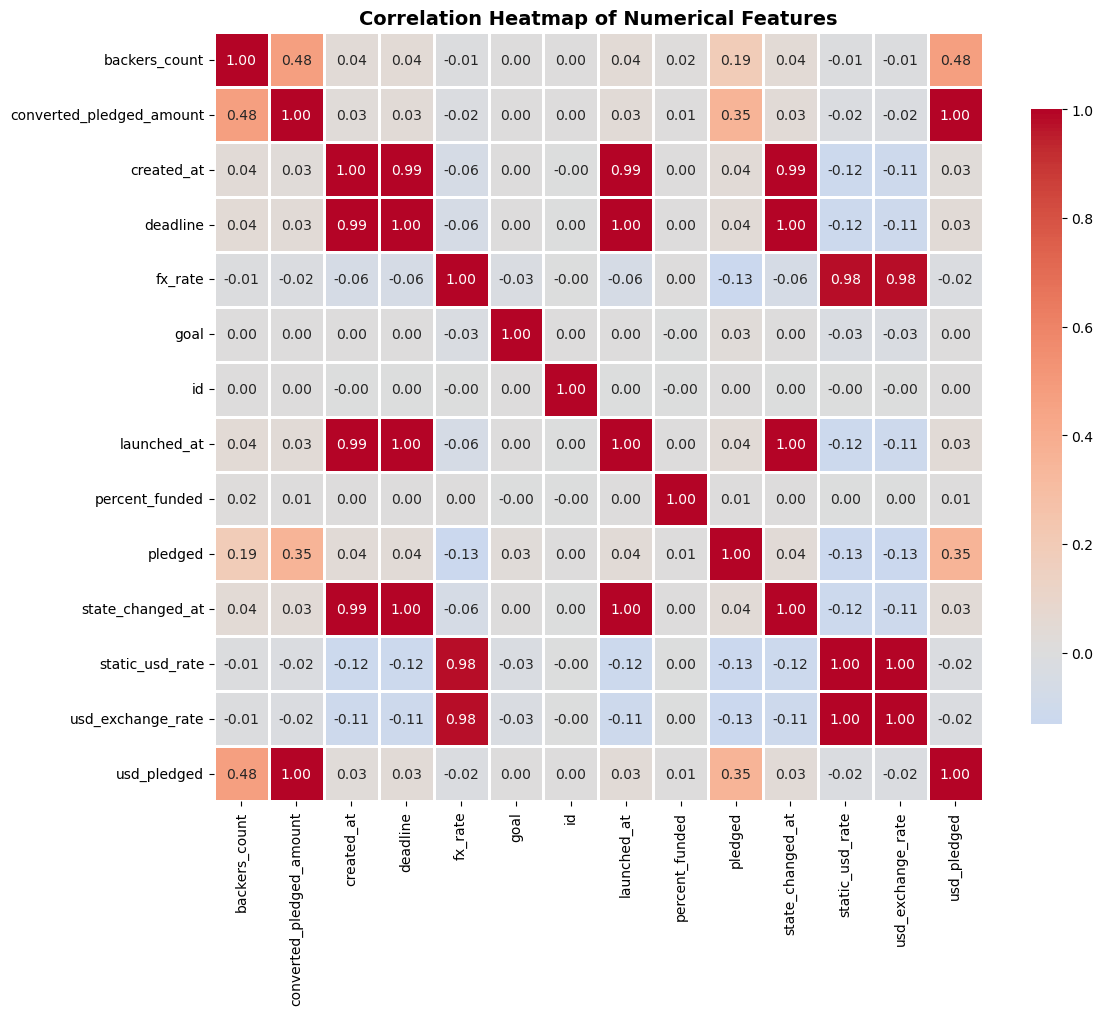

In [76]:
# Correlation heatmap
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

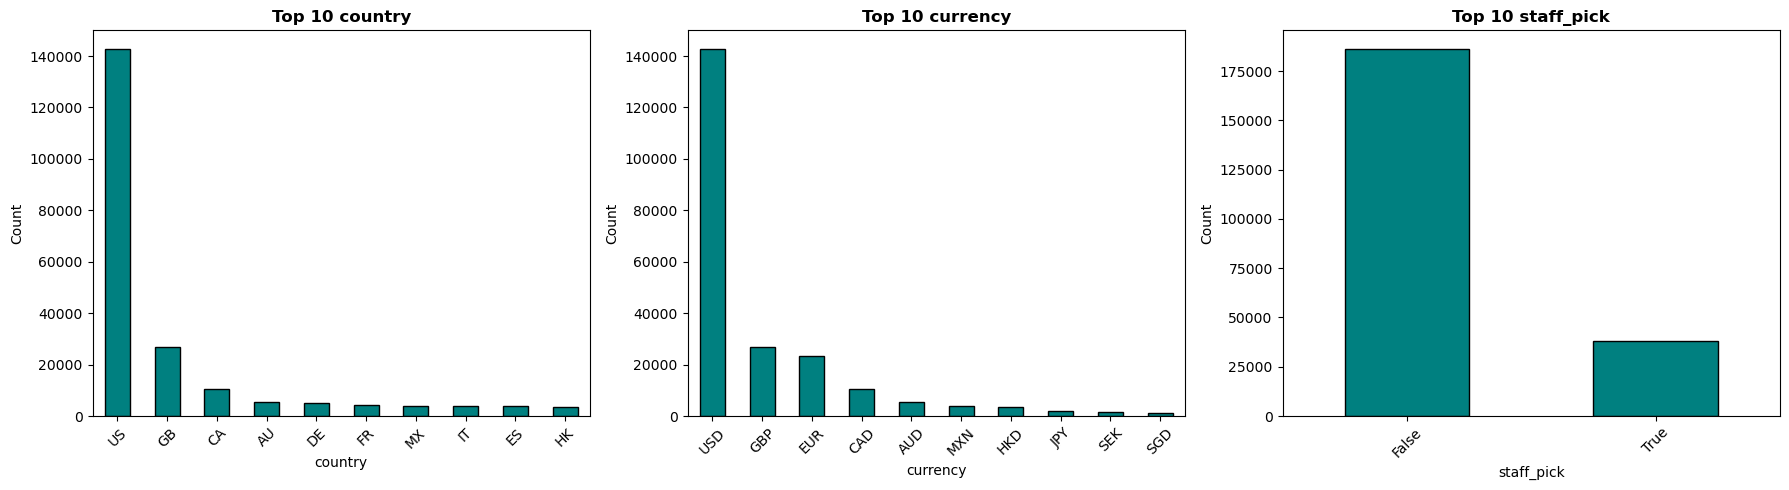

In [77]:
# Categorical features analysis
categorical_cols = ['country', 'currency', 'staff_pick']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(categorical_cols):
    if col in df.columns:
        top_categories = df[col].value_counts().head(10)
        top_categories.plot(kind='bar', ax=axes[idx], color='teal', edgecolor='black')
        axes[idx].set_title(f'Top 10 {col}', fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Count')
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

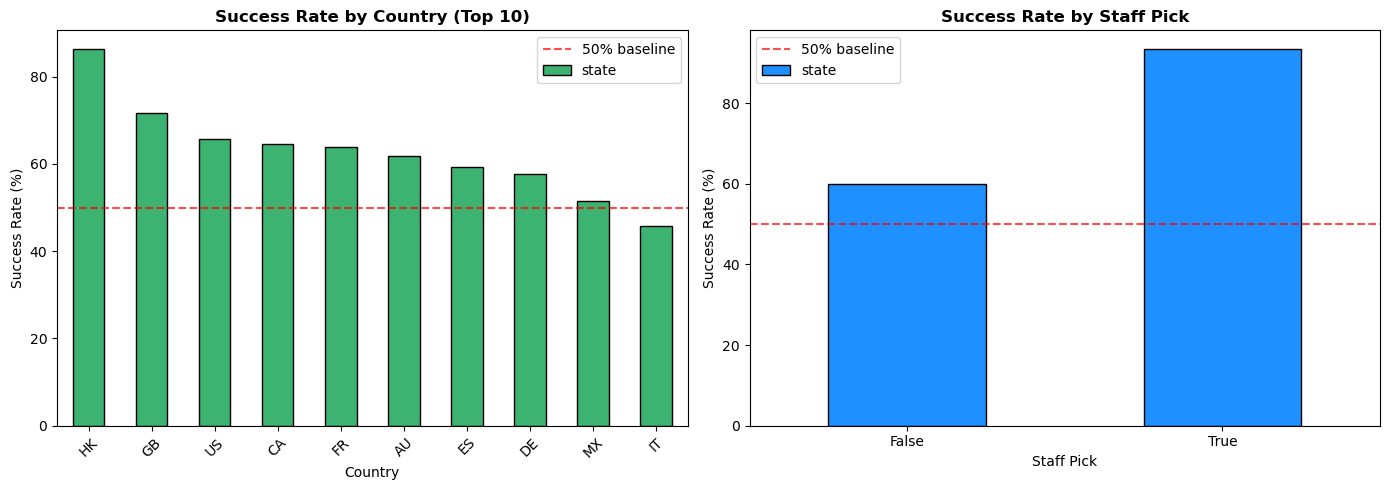

In [78]:
# Success rate by categorical features
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Success rate by country (top 10)
top_countries = df['country'].value_counts().head(10).index
success_by_country = df[df['country'].isin(top_countries)].groupby('country')['state'].apply(
    lambda x: (x == 'successful').mean() * 100
).sort_values(ascending=False)

success_by_country.plot(kind='bar', ax=axes[0], color='mediumseagreen', edgecolor='black')
axes[0].set_title('Success Rate by Country (Top 10)', fontweight='bold')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Success Rate (%)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].axhline(y=50, color='red', linestyle='--', alpha=0.7, label='50% baseline')
axes[0].legend()

# Success rate by staff_pick
success_by_staff = df.groupby('staff_pick')['state'].apply(
    lambda x: (x == 'successful').mean() * 100
)

success_by_staff.plot(kind='bar', ax=axes[1], color='dodgerblue', edgecolor='black')
axes[1].set_title('Success Rate by Staff Pick', fontweight='bold')
axes[1].set_xlabel('Staff Pick')
axes[1].set_ylabel('Success Rate (%)')
axes[1].tick_params(axis='x', rotation=0)
axes[1].axhline(y=50, color='red', linestyle='--', alpha=0.7, label='50% baseline')
axes[1].legend()

plt.tight_layout()
plt.show()

## Feature Engineering

In [79]:
import json
def extract_main_category(df):
    """Parses the 'category' JSON string to extract the parent category name."""
    # Convert JSON string to Python dictionary
    category_dicts = df['category'].apply(json.loads)
    
    # Extract the 'parent_name' or fall back to 'name'
    df['main_category'] = category_dicts.apply(
        lambda x: x.get('parent_name') if 'parent_name' in x and x.get('parent_name') else x.get('name')
    )
    df['main_category'] = df['main_category'].fillna('Unknown')
    return df

# 1. Feature Engineering: Text Lengths
df_oct['blurb_length'] = df_oct['blurb'].fillna("").apply(len)
df_nov['blurb_length'] = df_nov['blurb'].fillna("").apply(len)

df_oct['name_length'] = df_oct['name'].fillna("").apply(len)
df_nov['name_length'] = df_nov['name'].fillna("").apply(len)

# 2. Feature Engineering: Date/Time Features
for df in [df_oct, df_nov]:
    # Convert UNIX timestamps to datetime
    df['created_at'] = pd.to_datetime(df['created_at'], unit='s')
    df['launched_at'] = pd.to_datetime(df['launched_at'], unit='s')
    df['deadline'] = pd.to_datetime(df['deadline'], unit='s')
    
    # Campaign duration in days
    df['duration_days'] = (df['deadline'] - df['launched_at']).dt.days
    
    # Extract components from launch time
    df['launch_month'] = df['launched_at'].dt.month
    df['launch_day'] = df['launched_at'].dt.day
    df['launch_hour'] = df['launched_at'].dt.hour
    df['launch_dayofweek'] = df['launched_at'].dt.dayofweek

# 3. Feature Engineering: Main Category (New Feature)
oct = extract_main_category(df_oct)
nov = extract_main_category(df_nov)

print(f"Main categories extracted: {df_oct['main_category'].nunique()} unique values.")
print(f"Main categories extracted: {df_nov['main_category'].nunique()} unique values.")

Main categories extracted: 15 unique values.
Main categories extracted: 15 unique values.


In [80]:
# 4. Feature Engineering: Convert goal to USD
# Use static_usd_rate to convert goal to USD
df_oct['goal_usd'] = df_oct['goal'] * df_oct['static_usd_rate']
df_nov['goal_usd'] = df_nov['goal'] * df_nov['static_usd_rate']

print(f"October - goal_usd created. Sample values:")
print(df_oct[['goal', 'currency', 'static_usd_rate', 'goal_usd']].head())
print(f"\nNovember - goal_usd created. Sample values:")
print(df_nov[['goal', 'currency', 'static_usd_rate', 'goal_usd']].head())

October - goal_usd created. Sample values:
      goal currency  static_usd_rate      goal_usd
0    500.0      EUR         1.181673    590.836365
1   1000.0      USD         1.000000   1000.000000
2   5500.0      USD         1.000000   5500.000000
4  25000.0      USD         1.000000  25000.000000
5    500.0      GBP         1.310710    655.355235

November - goal_usd created. Sample values:
        goal currency  static_usd_rate      goal_usd
1     2000.0      GBP         1.221085    2442.16942
5   195900.0      USD         1.000000  195900.00000
6     5000.0      USD         1.000000    5000.00000
13   40000.0      USD         1.000000   40000.00000
14   10000.0      USD         1.000000   10000.00000


In [81]:
# Columns to drop because they are not useful or leak future info
drop_cols = [
    # Outcome / future info (NOT allowed)
    'backers_count', 'pledged', 'usd_pledged', 'converted_pledged_amount',
    'percent_funded', 'spotlight', 'state_changed_at', 'static_usd_rate',
    'usd_exchange_rate', 'usd_type', 'fx_rate', 'current_currency', 'goal',

    # IDs, URLs, media, extra text/location
    'id', 'creator', 'profile', 'slug', 'source_url', 'urls', 'photo', 'video',
    'location', 'country_displayable_name',

    # Post-campaign / not relevant flags
    'is_disliked', 'is_in_post_campaign_pledging_phase', 'is_liked', 'is_starrable',

    # Raw text + raw timestamps (Replaced by engineered features)
    'blurb', 'name', 'created_at', 'deadline', 'launched_at',
    
    # Detailed Category (Replaced by main_category)
    'category'
]

df_oct = df_oct.drop(columns=drop_cols)
df_nov = df_nov.drop(columns=drop_cols)

# Create binary target (1 = successful, 0 = failed)
df_oct['state_binary'] = (df_oct['state'] == 'successful').astype(int)
df_nov['state_binary'] = (df_nov['state'] == 'successful').astype(int)

df_oct.head()

,country,currency,currency_symbol,currency_trailing_code,disable_communication,is_launched,prelaunch_activated,staff_pick,state,blurb_length,name_length,duration_days,launch_month,launch_day,launch_hour,launch_dayofweek,main_category,goal_usd,state_binary
0,IT,EUR,€,False,False,True,False,False,failed,98,30,20,10,13,22,1,Journalism,590.836365,0
1,US,USD,$,True,False,True,False,False,failed,93,12,60,7,5,18,6,Journalism,1000.000000,0
2,US,USD,$,True,False,True,False,False,failed,131,30,40,7,4,15,5,Journalism,5500.000000,0
4,US,USD,$,True,False,True,False,True,successful,60,7,30,4,5,18,1,Film & Video,25000.000000,1
5,GB,GBP,£,False,False,True,False,False,successful,91,18,30,3,31,16,3,Film & Video,655.355235,1


In [82]:
# Separate features X and target y
X_train = df_oct.drop(columns=['state', 'state_binary'])
y_train = df_oct['state_binary']

X_test = df_nov.drop(columns=['state', 'state_binary'])
y_test = df_nov['state_binary']

print(f"X_train shape before encoding: {X_train.shape}")

X_train shape before encoding: (224438, 17)


## Task 1 – Classification Model

### Prepare Data for Classification

In [83]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Create copies for encoding
X_train = df_oct.drop(columns=['state', 'state_binary']).copy()
y_train = df_oct['state_binary'].copy()

X_test = df_nov.drop(columns=['state', 'state_binary']).copy()
y_test = df_nov['state_binary'].copy()

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")

# Label encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))
    label_encoders[col] = le

print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train distribution:\n{y_train.value_counts()}")
print(f"y_test distribution:\n{y_test.value_counts()}")

Categorical columns: ['country', 'currency', 'currency_symbol', 'currency_trailing_code', 'disable_communication', 'is_launched', 'prelaunch_activated', 'staff_pick', 'main_category']

X_train shape: (224438, 17)
X_test shape: (226799, 17)
y_train distribution:
state_binary
1    147176
0     77262
Name: count, dtype: int64
y_test distribution:
state_binary
1    150556
0     76243
Name: count, dtype: int64


In [84]:
# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully")

Features scaled successfully


### Classification Models

#### 1. Logistic Regression

In [91]:
# 1. Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

print("=== Logistic Regression ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_lr):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

=== Logistic Regression ===
Accuracy: 0.7314
Precision: 0.7471
Recall: 0.9002
F1-Score: 0.8165
ROC-AUC: 0.7808

Confusion Matrix:
[[ 30363  45880]
 [ 15029 135527]]


In [93]:
# 3. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("\n=== Random Forest ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_importance.head(10))


=== Random Forest ===
Accuracy: 0.7626
Precision: 0.7645
Recall: 0.9284
F1-Score: 0.8385
ROC-AUC: 0.8305

Top 10 Important Features:
                feature  importance
16             goal_usd    0.320568
7            staff_pick    0.264918
6   prelaunch_activated    0.133190
10        duration_days    0.126388
15        main_category    0.046896
9           name_length    0.027501
13          launch_hour    0.018035
8          blurb_length    0.012334
1              currency    0.011006
0               country    0.009341


In [94]:
# 4. Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]

print("\n=== Gradient Boosting ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_gb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_gb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_gb):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_gb):.4f}")


=== Gradient Boosting ===
Accuracy: 0.7828
Precision: 0.8029
Recall: 0.8918
F1-Score: 0.8450
ROC-AUC: 0.8439


In [95]:
# 5. K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

print("\n=== K-Nearest Neighbors ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_knn):.4f}")


=== K-Nearest Neighbors ===
Accuracy: 0.7986
Precision: 0.8248
Recall: 0.8845
F1-Score: 0.8536
ROC-AUC: 0.8716


### Model Comparison


=== Model Comparison ===
                 Model  Train Accuracy  Test Accuracy  Train F1   Test F1  \
4                  KNN        0.800270       0.798623  0.853313  0.853613   
3    Gradient Boosting        0.779690       0.782834  0.841220  0.845011   
2        Random Forest        0.758771       0.762640  0.834508  0.838528   
1        Decision Tree        0.757942       0.760841  0.827344  0.830984   
0  Logistic Regression        0.727248       0.731441  0.812070  0.816519   
6          Naive Bayes        0.489316       0.483256  0.378409  0.378262   
5                  SVM        0.696687       0.702437  0.800061  0.805216   

   Test ROC-AUC  Accuracy Gap    F1 Gap  
4      0.871615      0.001647 -0.000299  
3      0.843884     -0.003144 -0.003791  
2      0.830494     -0.003869 -0.004020  
1      0.821159     -0.002899 -0.003640  
0      0.780826     -0.004193 -0.004449  
6      0.761110      0.006059  0.000147  
5      0.731350     -0.005750 -0.005155  


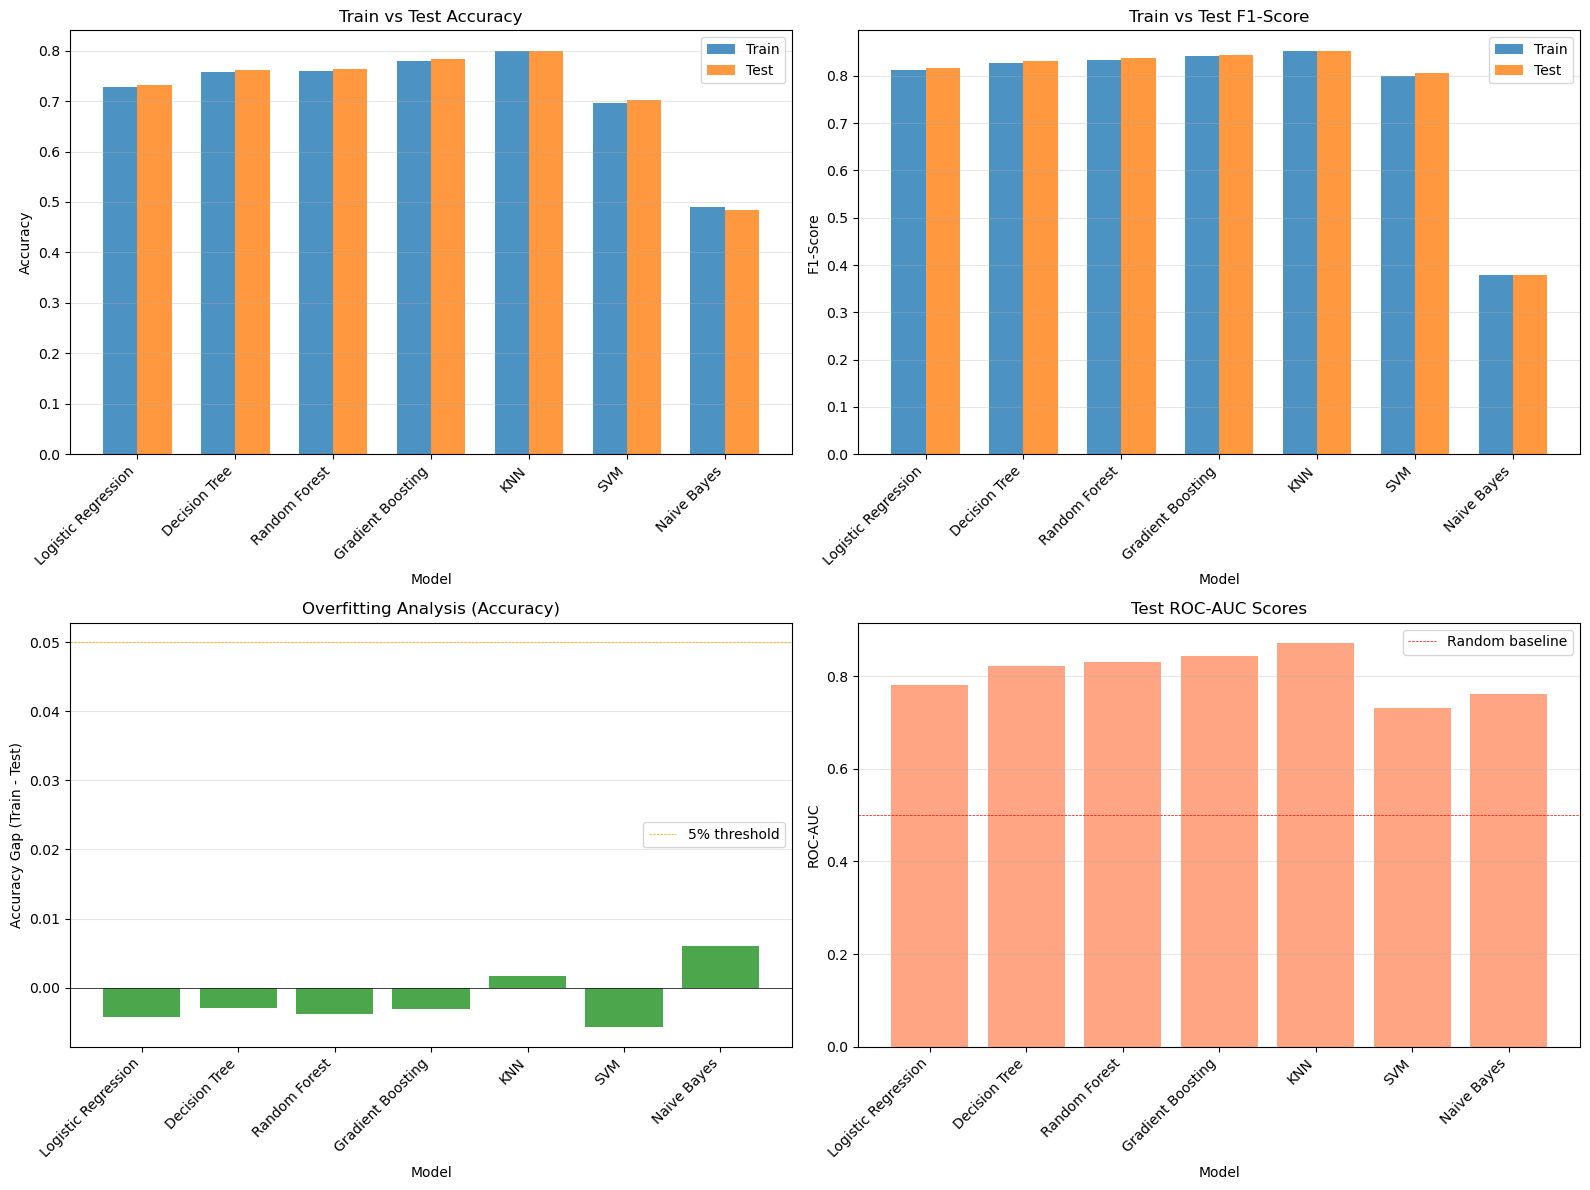


=== Overfitting Analysis ===
Models with significant overfitting (>5% accuracy gap):
No models show significant overfitting.


In [ ]:
# Calculate train predictions for all models
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_train_pred_rf = rf_model.predict(X_train)
y_train_pred_gb = gb_model.predict(X_train)
y_train_pred_knn = knn_model.predict(X_train_scaled)


# Compare all models with train and test scores
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 
              'Gradient Boosting', 'KNN'],
    'Train Accuracy': [
        accuracy_score(y_train, y_train_pred_lr),
        accuracy_score(y_train, y_train_pred_rf),
        accuracy_score(y_train, y_train_pred_gb),
        accuracy_score(y_train, y_train_pred_knn),
    ],
    'Test Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_gb),
        accuracy_score(y_test, y_pred_knn),
    ],
    'Train F1': [
        f1_score(y_train, y_train_pred_lr),
        f1_score(y_train, y_train_pred_rf),
        f1_score(y_train, y_train_pred_gb),
        f1_score(y_train, y_train_pred_knn),
    ],
    'Test F1': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_gb),
        f1_score(y_test, y_pred_knn),
    ],
    'Test ROC-AUC': [
        roc_auc_score(y_test, y_pred_proba_lr),
        roc_auc_score(y_test, y_pred_proba_rf),
        roc_auc_score(y_test, y_pred_proba_gb),
        roc_auc_score(y_test, y_pred_proba_knn),
    ]
})

# Calculate overfitting (difference between train and test)
results['Accuracy Gap'] = results['Train Accuracy'] - results['Test Accuracy']
results['F1 Gap'] = results['Train F1'] - results['Test F1']

print("\n=== Model Comparison ===")
print(results.sort_values('Test ROC-AUC', ascending=False))

# Visualize train vs test performance
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Accuracy comparison
x = np.arange(len(results['Model']))
width = 0.35
axes[0, 0].bar(x - width/2, results['Train Accuracy'], width, label='Train', alpha=0.8)
axes[0, 0].bar(x + width/2, results['Test Accuracy'], width, label='Test', alpha=0.8)
axes[0, 0].set_xlabel('Model')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Train vs Test Accuracy')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(results['Model'], rotation=45, ha='right')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# F1-Score comparison
axes[0, 1].bar(x - width/2, results['Train F1'], width, label='Train', alpha=0.8)
axes[0, 1].bar(x + width/2, results['Test F1'], width, label='Test', alpha=0.8)
axes[0, 1].set_xlabel('Model')
axes[0, 1].set_ylabel('F1-Score')
axes[0, 1].set_title('Train vs Test F1-Score')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(results['Model'], rotation=45, ha='right')
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# Overfitting analysis - Accuracy Gap
colors = ['red' if gap > 0.05 else 'green' for gap in results['Accuracy Gap']]
axes[1, 0].bar(x, results['Accuracy Gap'], color=colors, alpha=0.7)
axes[1, 0].set_xlabel('Model')
axes[1, 0].set_ylabel('Accuracy Gap (Train - Test)')
axes[1, 0].set_title('Overfitting Analysis (Accuracy)')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(results['Model'], rotation=45, ha='right')
axes[1, 0].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[1, 0].axhline(y=0.05, color='orange', linestyle='--', linewidth=0.5, label='5% threshold')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# ROC-AUC
axes[1, 1].bar(x, results['Test ROC-AUC'], color='coral', alpha=0.7)
axes[1, 1].set_xlabel('Model')
axes[1, 1].set_ylabel('ROC-AUC')
axes[1, 1].set_title('Test ROC-AUC Scores')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(results['Model'], rotation=45, ha='right')
axes[1, 1].axhline(y=0.5, color='red', linestyle='--', linewidth=0.5, label='Random baseline')
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print overfitting summary
print("\n=== Overfitting Analysis ===")
print("Models with significant overfitting (>5% accuracy gap):")
overfitted = results[results['Accuracy Gap'] > 0.05]
if len(overfitted) > 0:
    print(overfitted[['Model', 'Train Accuracy', 'Test Accuracy', 'Accuracy Gap']])
else:
    print("No models show significant overfitting.")

## Hyperparameter Tuning

Tuning the top 4 models using RandomizedSearchCV with 3-fold cross-validation.

In [99]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint, uniform
import time

# Use a sample for faster tuning
tune_sample_size = min(30000, len(X_train))
tune_idx = np.random.choice(len(X_train), tune_sample_size, replace=False)
X_train_tune = X_train.iloc[tune_idx]
y_train_tune = y_train.iloc[tune_idx]
X_train_tune_scaled = X_train_scaled[tune_idx]

print(f"Tuning on {tune_sample_size} samples with 3-fold CV")

Tuning on 30000 samples with 3-fold CV


### 1. Logistic Regression Tuning

In [100]:
# Logistic Regression hyperparameter tuning
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000]
}

print("Tuning Logistic Regression...")
start_time = time.time()

lr_grid = GridSearchCV(
    LogisticRegression(random_state=42),
    lr_param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
lr_grid.fit(X_train_tune_scaled, y_train_tune)

print(f"\nBest parameters: {lr_grid.best_params_}")
print(f"Best CV score: {lr_grid.best_score_:.4f}")
print(f"Time taken: {time.time() - start_time:.2f} seconds")

# Evaluate on test set
lr_tuned = lr_grid.best_estimator_
y_pred_lr_tuned = lr_tuned.predict(X_test_scaled)
y_pred_proba_lr_tuned = lr_tuned.predict_proba(X_test_scaled)[:, 1]

print(f"\nTest Accuracy: {accuracy_score(y_test, y_pred_lr_tuned):.4f}")
print(f"Test ROC-AUC: {roc_auc_score(y_test, y_pred_proba_lr_tuned):.4f}")

Tuning Logistic Regression...
Fitting 3 folds for each of 24 candidates, totalling 72 fits


/opt/anaconda3/envs/datasci/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/datasci/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/datasci/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/datasci/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/datasci/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/datasci/lib/python3.


Best parameters: {'C': 100, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV score: 0.7787
Time taken: 218.67 seconds

Test Accuracy: 0.7324
Test ROC-AUC: 0.7812


### 2. Random Forest Tuning

In [101]:
# Random Forest hyperparameter tuning
rf_param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

print("Tuning Random Forest...")
start_time = time.time()

rf_random = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    rf_param_dist,
    n_iter=20,  # Number of parameter settings sampled
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=42
)
rf_random.fit(X_train_tune, y_train_tune)

print(f"\nBest parameters: {rf_random.best_params_}")
print(f"Best CV score: {rf_random.best_score_:.4f}")
print(f"Time taken: {time.time() - start_time:.2f} seconds")

# Evaluate on test set
rf_tuned = rf_random.best_estimator_
y_pred_rf_tuned = rf_tuned.predict(X_test)
y_pred_proba_rf_tuned = rf_tuned.predict_proba(X_test)[:, 1]

print(f"\nTest Accuracy: {accuracy_score(y_test, y_pred_rf_tuned):.4f}")
print(f"Test ROC-AUC: {roc_auc_score(y_test, y_pred_proba_rf_tuned):.4f}")

# Feature importance from tuned model
feature_importance_tuned = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_tuned.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Important Features (Tuned Model):")
print(feature_importance_tuned.head(10))

Tuning Random Forest...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}
Best CV score: 0.8229
Time taken: 532.11 seconds

Test Accuracy: 0.7990
Test ROC-AUC: 0.8650

Top 10 Important Features (Tuned Model):
                feature  importance
16             goal_usd    0.219081
7            staff_pick    0.104235
10        duration_days    0.101853
9           name_length    0.082959
8          blurb_length    0.081143
15        main_category    0.078867
12           launch_day    0.070796
13          launch_hour    0.068425
11         launch_month    0.051945
6   prelaunch_activated    0.050457


### 3. Gradient Boosting Tuning

In [102]:
# Gradient Boosting hyperparameter tuning
gb_param_dist = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

print("Tuning Gradient Boosting...")
start_time = time.time()

gb_random = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=42),
    gb_param_dist,
    n_iter=20,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=42
)
gb_random.fit(X_train_tune, y_train_tune)

print(f"\nBest parameters: {gb_random.best_params_}")
print(f"Best CV score: {gb_random.best_score_:.4f}")
print(f"Time taken: {time.time() - start_time:.2f} seconds")

# Evaluate on test set
gb_tuned = gb_random.best_estimator_
y_pred_gb_tuned = gb_tuned.predict(X_test)
y_pred_proba_gb_tuned = gb_tuned.predict_proba(X_test)[:, 1]

print(f"\nTest Accuracy: {accuracy_score(y_test, y_pred_gb_tuned):.4f}")
print(f"Test ROC-AUC: {roc_auc_score(y_test, y_pred_proba_gb_tuned):.4f}")

Tuning Gradient Boosting...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best parameters: {'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 3, 'learning_rate': 0.2}
Best CV score: 0.8283
Time taken: 398.15 seconds

Test Accuracy: 0.7759
Test ROC-AUC: 0.8340


### 4. K-Nearest Neighbors Tuning

In [103]:
# KNN hyperparameter tuning
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}

print("Tuning K-Nearest Neighbors...")
start_time = time.time()

knn_grid = GridSearchCV(
    KNeighborsClassifier(),
    knn_param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
knn_grid.fit(X_train_tune_scaled, y_train_tune)

print(f"\nBest parameters: {knn_grid.best_params_}")
print(f"Best CV score: {knn_grid.best_score_:.4f}")
print(f"Time taken: {time.time() - start_time:.2f} seconds")

# Evaluate on test set
knn_tuned = knn_grid.best_estimator_
y_pred_knn_tuned = knn_tuned.predict(X_test_scaled)
y_pred_proba_knn_tuned = knn_tuned.predict_proba(X_test_scaled)[:, 1]

print(f"\nTest Accuracy: {accuracy_score(y_test, y_pred_knn_tuned):.4f}")
print(f"Test ROC-AUC: {roc_auc_score(y_test, y_pred_proba_knn_tuned):.4f}")

Tuning K-Nearest Neighbors...
Fitting 3 folds for each of 72 candidates, totalling 216 fits

Best parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
Best CV score: 0.7435
Time taken: 122.88 seconds

Test Accuracy: 0.7458
Test ROC-AUC: 0.8160


### Comparison: Before vs After Tuning


=== Before vs After Tuning ===
                 Model  Original Test Accuracy  Tuned Test Accuracy  \
0  Logistic Regression                0.731441             0.732393   
1        Random Forest                0.762640             0.798985   
2    Gradient Boosting                0.782834             0.775868   
3                  KNN                0.798623             0.745823   

   Original Test ROC-AUC  Tuned Test ROC-AUC  Accuracy Improvement  \
0               0.780826            0.781162              0.000952   
1               0.830494            0.865043              0.036345   
2               0.843884            0.833961             -0.006967   
3               0.871615            0.815962             -0.052800   

   ROC-AUC Improvement  
0             0.000336  
1             0.034549  
2            -0.009923  
3            -0.055652  


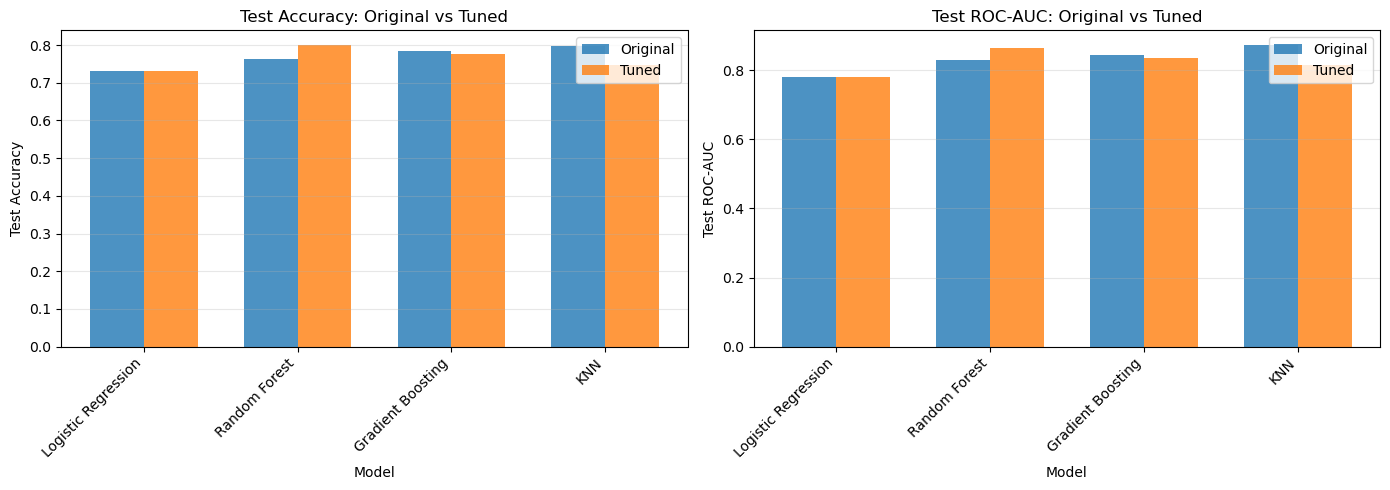


=== Best Tuned Model ===
Model: Random Forest
Test Accuracy: 0.7990
Test ROC-AUC: 0.8650


In [104]:
# Compare original vs tuned models
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'KNN'],
    'Original Test Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_gb),
        accuracy_score(y_test, y_pred_knn)
    ],
    'Tuned Test Accuracy': [
        accuracy_score(y_test, y_pred_lr_tuned),
        accuracy_score(y_test, y_pred_rf_tuned),
        accuracy_score(y_test, y_pred_gb_tuned),
        accuracy_score(y_test, y_pred_knn_tuned)
    ],
    'Original Test ROC-AUC': [
        roc_auc_score(y_test, y_pred_proba_lr),
        roc_auc_score(y_test, y_pred_proba_rf),
        roc_auc_score(y_test, y_pred_proba_gb),
        roc_auc_score(y_test, y_pred_proba_knn)
    ],
    'Tuned Test ROC-AUC': [
        roc_auc_score(y_test, y_pred_proba_lr_tuned),
        roc_auc_score(y_test, y_pred_proba_rf_tuned),
        roc_auc_score(y_test, y_pred_proba_gb_tuned),
        roc_auc_score(y_test, y_pred_proba_knn_tuned)
    ]
})

comparison['Accuracy Improvement'] = comparison['Tuned Test Accuracy'] - comparison['Original Test Accuracy']
comparison['ROC-AUC Improvement'] = comparison['Tuned Test ROC-AUC'] - comparison['Original Test ROC-AUC']

print("\n=== Before vs After Tuning ===")
print(comparison)

# Visualize improvement
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

x = np.arange(len(comparison['Model']))
width = 0.35

# Accuracy comparison
axes[0].bar(x - width/2, comparison['Original Test Accuracy'], width, label='Original', alpha=0.8)
axes[0].bar(x + width/2, comparison['Tuned Test Accuracy'], width, label='Tuned', alpha=0.8)
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Test Accuracy')
axes[0].set_title('Test Accuracy: Original vs Tuned')
axes[0].set_xticks(x)
axes[0].set_xticklabels(comparison['Model'], rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# ROC-AUC comparison
axes[1].bar(x - width/2, comparison['Original Test ROC-AUC'], width, label='Original', alpha=0.8)
axes[1].bar(x + width/2, comparison['Tuned Test ROC-AUC'], width, label='Tuned', alpha=0.8)
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Test ROC-AUC')
axes[1].set_title('Test ROC-AUC: Original vs Tuned')
axes[1].set_xticks(x)
axes[1].set_xticklabels(comparison['Model'], rotation=45, ha='right')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n=== Best Tuned Model ===")
best_model_idx = comparison['Tuned Test ROC-AUC'].idxmax()
print(f"Model: {comparison.loc[best_model_idx, 'Model']}")
print(f"Test Accuracy: {comparison.loc[best_model_idx, 'Tuned Test Accuracy']:.4f}")
print(f"Test ROC-AUC: {comparison.loc[best_model_idx, 'Tuned Test ROC-AUC']:.4f}")

## Task 2 – Clustering Model

In [105]:
# Prepare data for clustering
X_clustering = X_train_scaled.copy()
sample_size = min(20000, len(X_clustering))
sample_idx = np.random.choice(len(X_clustering), sample_size, replace=False)
X_sample = X_clustering[sample_idx]
print(f"Clustering on {len(X_sample)} samples")

Clustering on 20000 samples


In [ ]:
# K-Means - Find optimal k
inertias = []
silhouette_scores = []
K_range = range(2, 16)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_sample)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_sample, kmeans.labels_))

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].plot(K_range, inertias, 'bo-')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')
axes[1].plot(K_range, silhouette_scores, 'ro-')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score vs K')
plt.tight_layout()
plt.show()

In [ ]:
# Fit K-Means and Hierarchical
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans_final.fit_predict(X_sample)

hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
hierarchical_labels = hierarchical.fit_predict(X_sample)

print(f"K-Means Silhouette: {silhouette_score(X_sample, kmeans_labels):.4f}")
print(f"Hierarchical Silhouette: {silhouette_score(X_sample, hierarchical_labels):.4f}")

In [ ]:
# PCA Visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_sample)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6, s=20)
axes[0].set_title('K-Means Clustering - PCA')
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='plasma', alpha=0.6, s=20)
axes[1].set_title('Hierarchical Clustering - PCA')
plt.tight_layout()
plt.show()